In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Intoduction

Data source: https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task?resource=download

### What does this data frame contain?

Bank Client Data:
* **age** (numeric)
* **job** : Type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar", "self-employed","retired","technician","services")
* **marital** : Marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* **education** (categorical: "unknown","secondary","primary","tertiary")
* **default**: Has credit in default? (binary: "yes","no")
* **balance**: Average yearly balance, in euros (numeric)
* **housing**: Has housing loan? (binary: "yes","no")
* **loan**: Has personal loan? (binary: "yes","no")

Related with the Last Contact of the Current Campaign:
* **contact**: Contact communication type (categorical: "unknown","telephone","cellular")
* **day**: Last contact day of the month (numeric)
* **month**: Last contact month of the year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* **duration**: Last contact duration, in seconds (numeric)

Other Attributes:
* **campaign**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not
previously contacted)
* **previous**: Number of contacts performed before this campaign and for this client (numeric)
* **poutcome**: Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output Variable (Desired Target):
* **y** - Has the client subscribed to a term deposit? (binary: "yes","no")

# Data import

In [75]:
bank_data_df = pd.read_csv('datasource/bank_data.csv')

### Data split

In [76]:
X_model, X_validate, y_model, y_validate = train_test_split(
    bank_data_df[bank_data_df.columns.values[:-1]],
    bank_data_df[bank_data_df.columns.values[-1]],
    test_size=0.2,
    stratify=bank_data_df[bank_data_df.columns.values[-1]],
    random_state=42,
)

In [77]:
pd.concat([X_model,y_model], axis=1).to_csv('datasource/bank_data_model.csv', index= False)
pd.concat([X_validate,y_validate], axis=1).to_csv('datasource/bank_data_validate.csv', index= False)

In [83]:
bank_data_df = pd.read_csv('datasource/bank_data_model.csv')

EDA
--------------------------

In [79]:
bank_data_df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2236,32,admin.,divorced,secondary,yes,-18,yes,no,unknown,12,may,155,3,-1,0,unknown,no
1,858,34,technician,single,tertiary,no,144,yes,yes,cellular,14,oct,104,1,85,19,failure,no
2,3531,44,management,divorced,tertiary,no,0,no,no,cellular,22,aug,54,2,-1,0,unknown,no
3,2737,34,blue-collar,married,secondary,no,8309,yes,yes,cellular,19,nov,50,1,-1,0,unknown,no
4,1257,51,blue-collar,married,primary,no,5050,no,yes,unknown,16,jun,75,7,-1,0,unknown,no


In [11]:
bank_data_df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,2240.352046,41.043971,1403.934458,16.040929,263.769358,2.795354,40.218473,0.545907
std,1302.788861,10.464800,2811.286428,8.207003,260.675975,3.144846,100.170192,1.657239
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1113.750000,33.000000,65.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2241.500000,39.000000,450.500000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3359.500000,48.000000,1477.750000,21.000000,330.000000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,42045.000000,31.000000,3025.000000,50.000000,871.000000,24.000000


In [12]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3616 non-null   int64 
 1   age         3616 non-null   int64 
 2   job         3616 non-null   object
 3   marital     3616 non-null   object
 4   education   3616 non-null   object
 5   default     3616 non-null   object
 6   balance     3616 non-null   int64 
 7   housing     3616 non-null   object
 8   loan        3616 non-null   object
 9   contact     3616 non-null   object
 10  day         3616 non-null   int64 
 11  month       3616 non-null   object
 12  duration    3616 non-null   int64 
 13  campaign    3616 non-null   int64 
 14  pdays       3616 non-null   int64 
 15  previous    3616 non-null   int64 
 16  poutcome    3616 non-null   object
 17  y           3616 non-null   object
dtypes: int64(8), object(10)
memory usage: 508.6+ KB


What we can clearly see is that there are no null observations. 
We decided to save our target value's name into targe_value variable.

In [13]:
target_value = 'y'

Analysis of numeric values
--------------------------

### Distribution

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>, <Axes: >]], dtype=object)

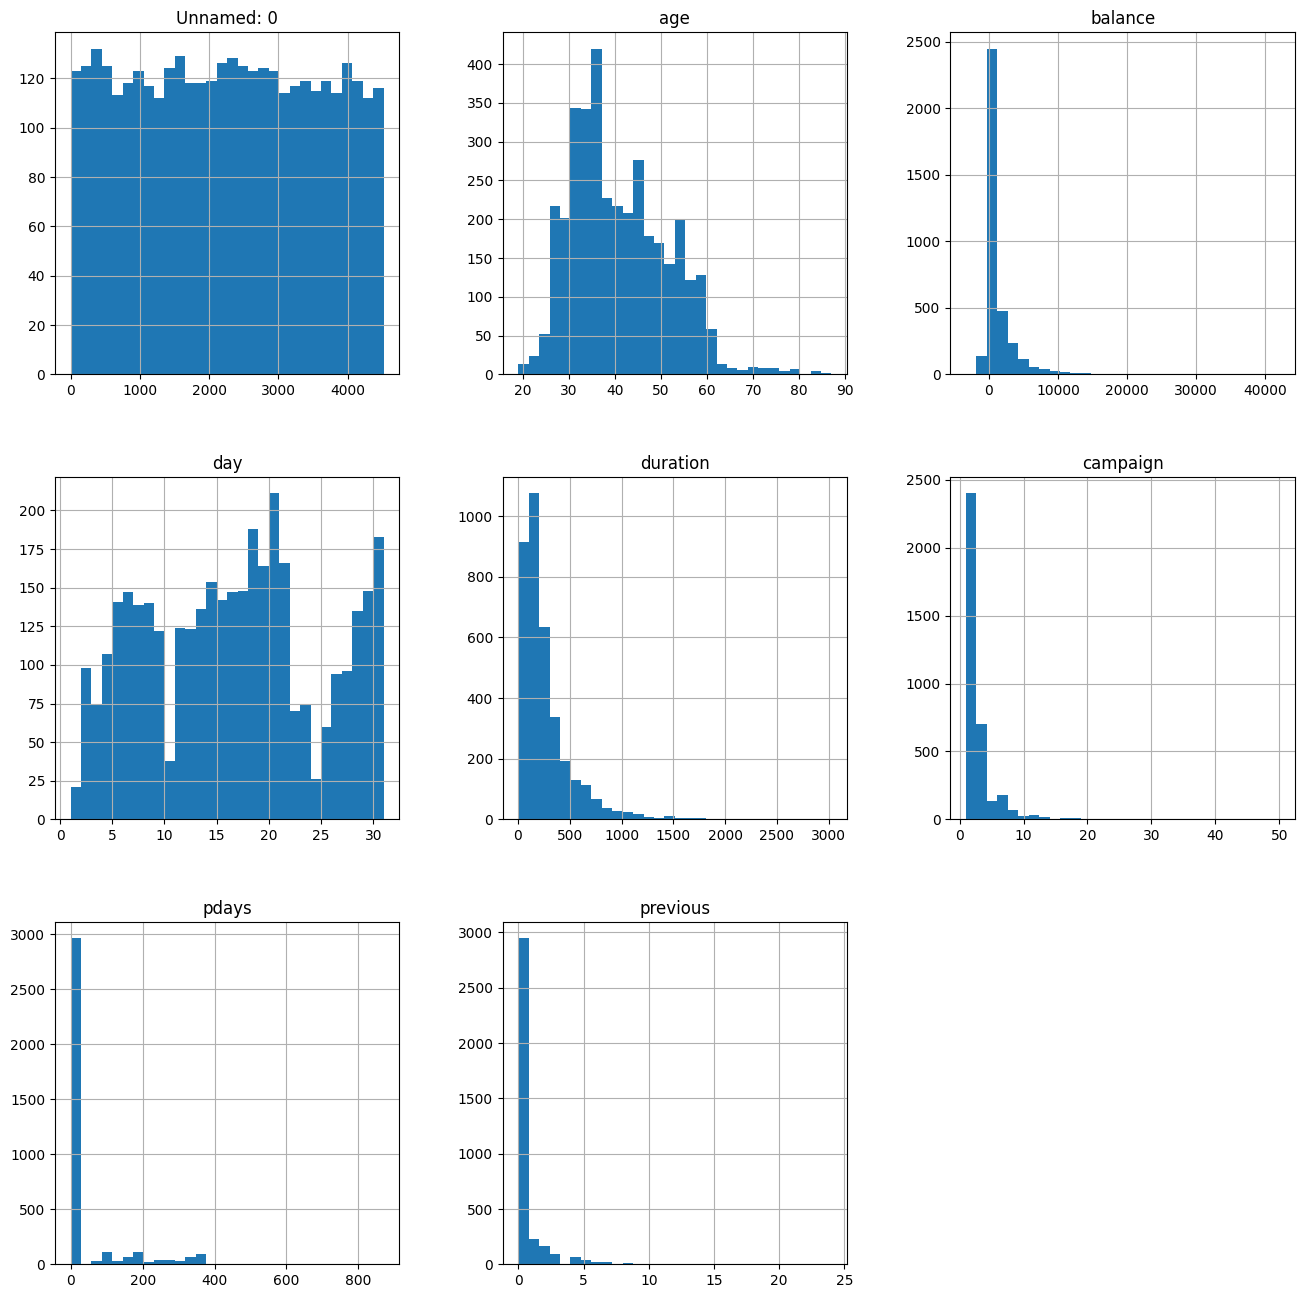

In [14]:
bank_data_df.hist(bins= 30, figsize=(16,16))

We found that one value contains just rows' indexes, so we decided to delete it 

In [84]:
bank_data_df = bank_data_df.iloc[:,1:]

In [40]:
numeric_values = bank_data_df.select_dtypes(include=np.number).columns.values
print(numeric_values)
print(type(numeric_values))
print(type(numeric_values[1]))
print(len(numeric_values))

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']
<class 'numpy.ndarray'>
<class 'str'>
7


In [17]:
bank_data_df[numeric_values].head()

,age,balance,day,duration,campaign,pdays,previous
0,32,-18,12,155,3,-1,0
1,34,144,14,104,1,85,19
2,44,0,22,54,2,-1,0
3,34,8309,19,50,1,-1,0
4,51,5050,16,75,7,-1,0


### Are there some obvious corellations beetween target and features?

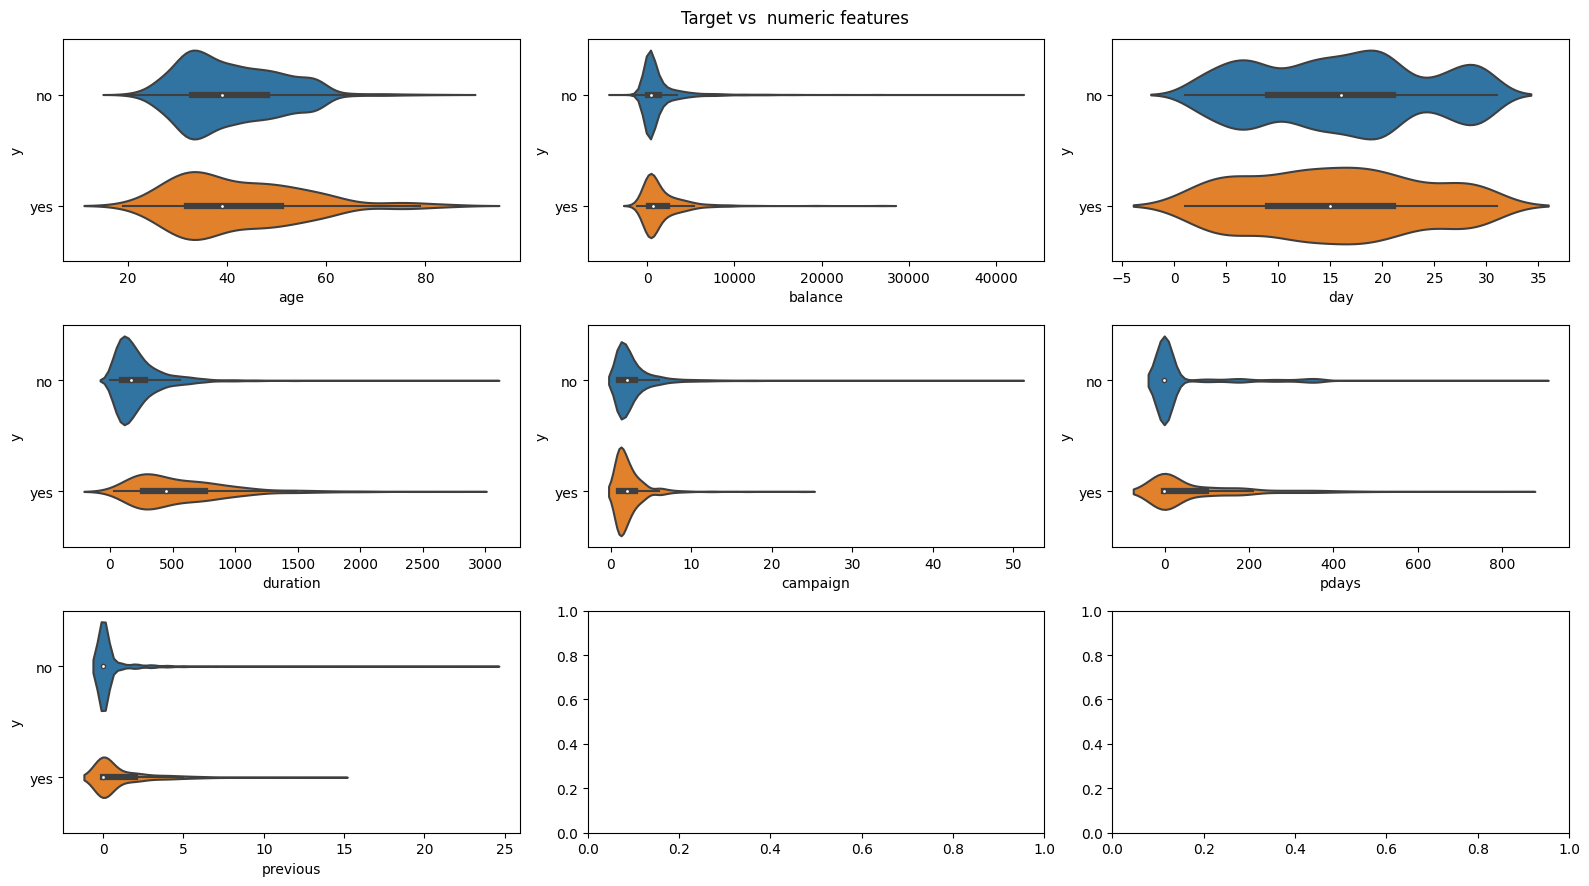

In [18]:
fig, axs = plt.subplots(3,3,figsize = (16,9))
axs = axs.flatten()
for i, col in enumerate(bank_data_df[numeric_values].columns):
    sns.violinplot(data=bank_data_df, x = col, y = target_value, ax = axs[i])

plt.suptitle("Target vs  numeric features")
plt.tight_layout()

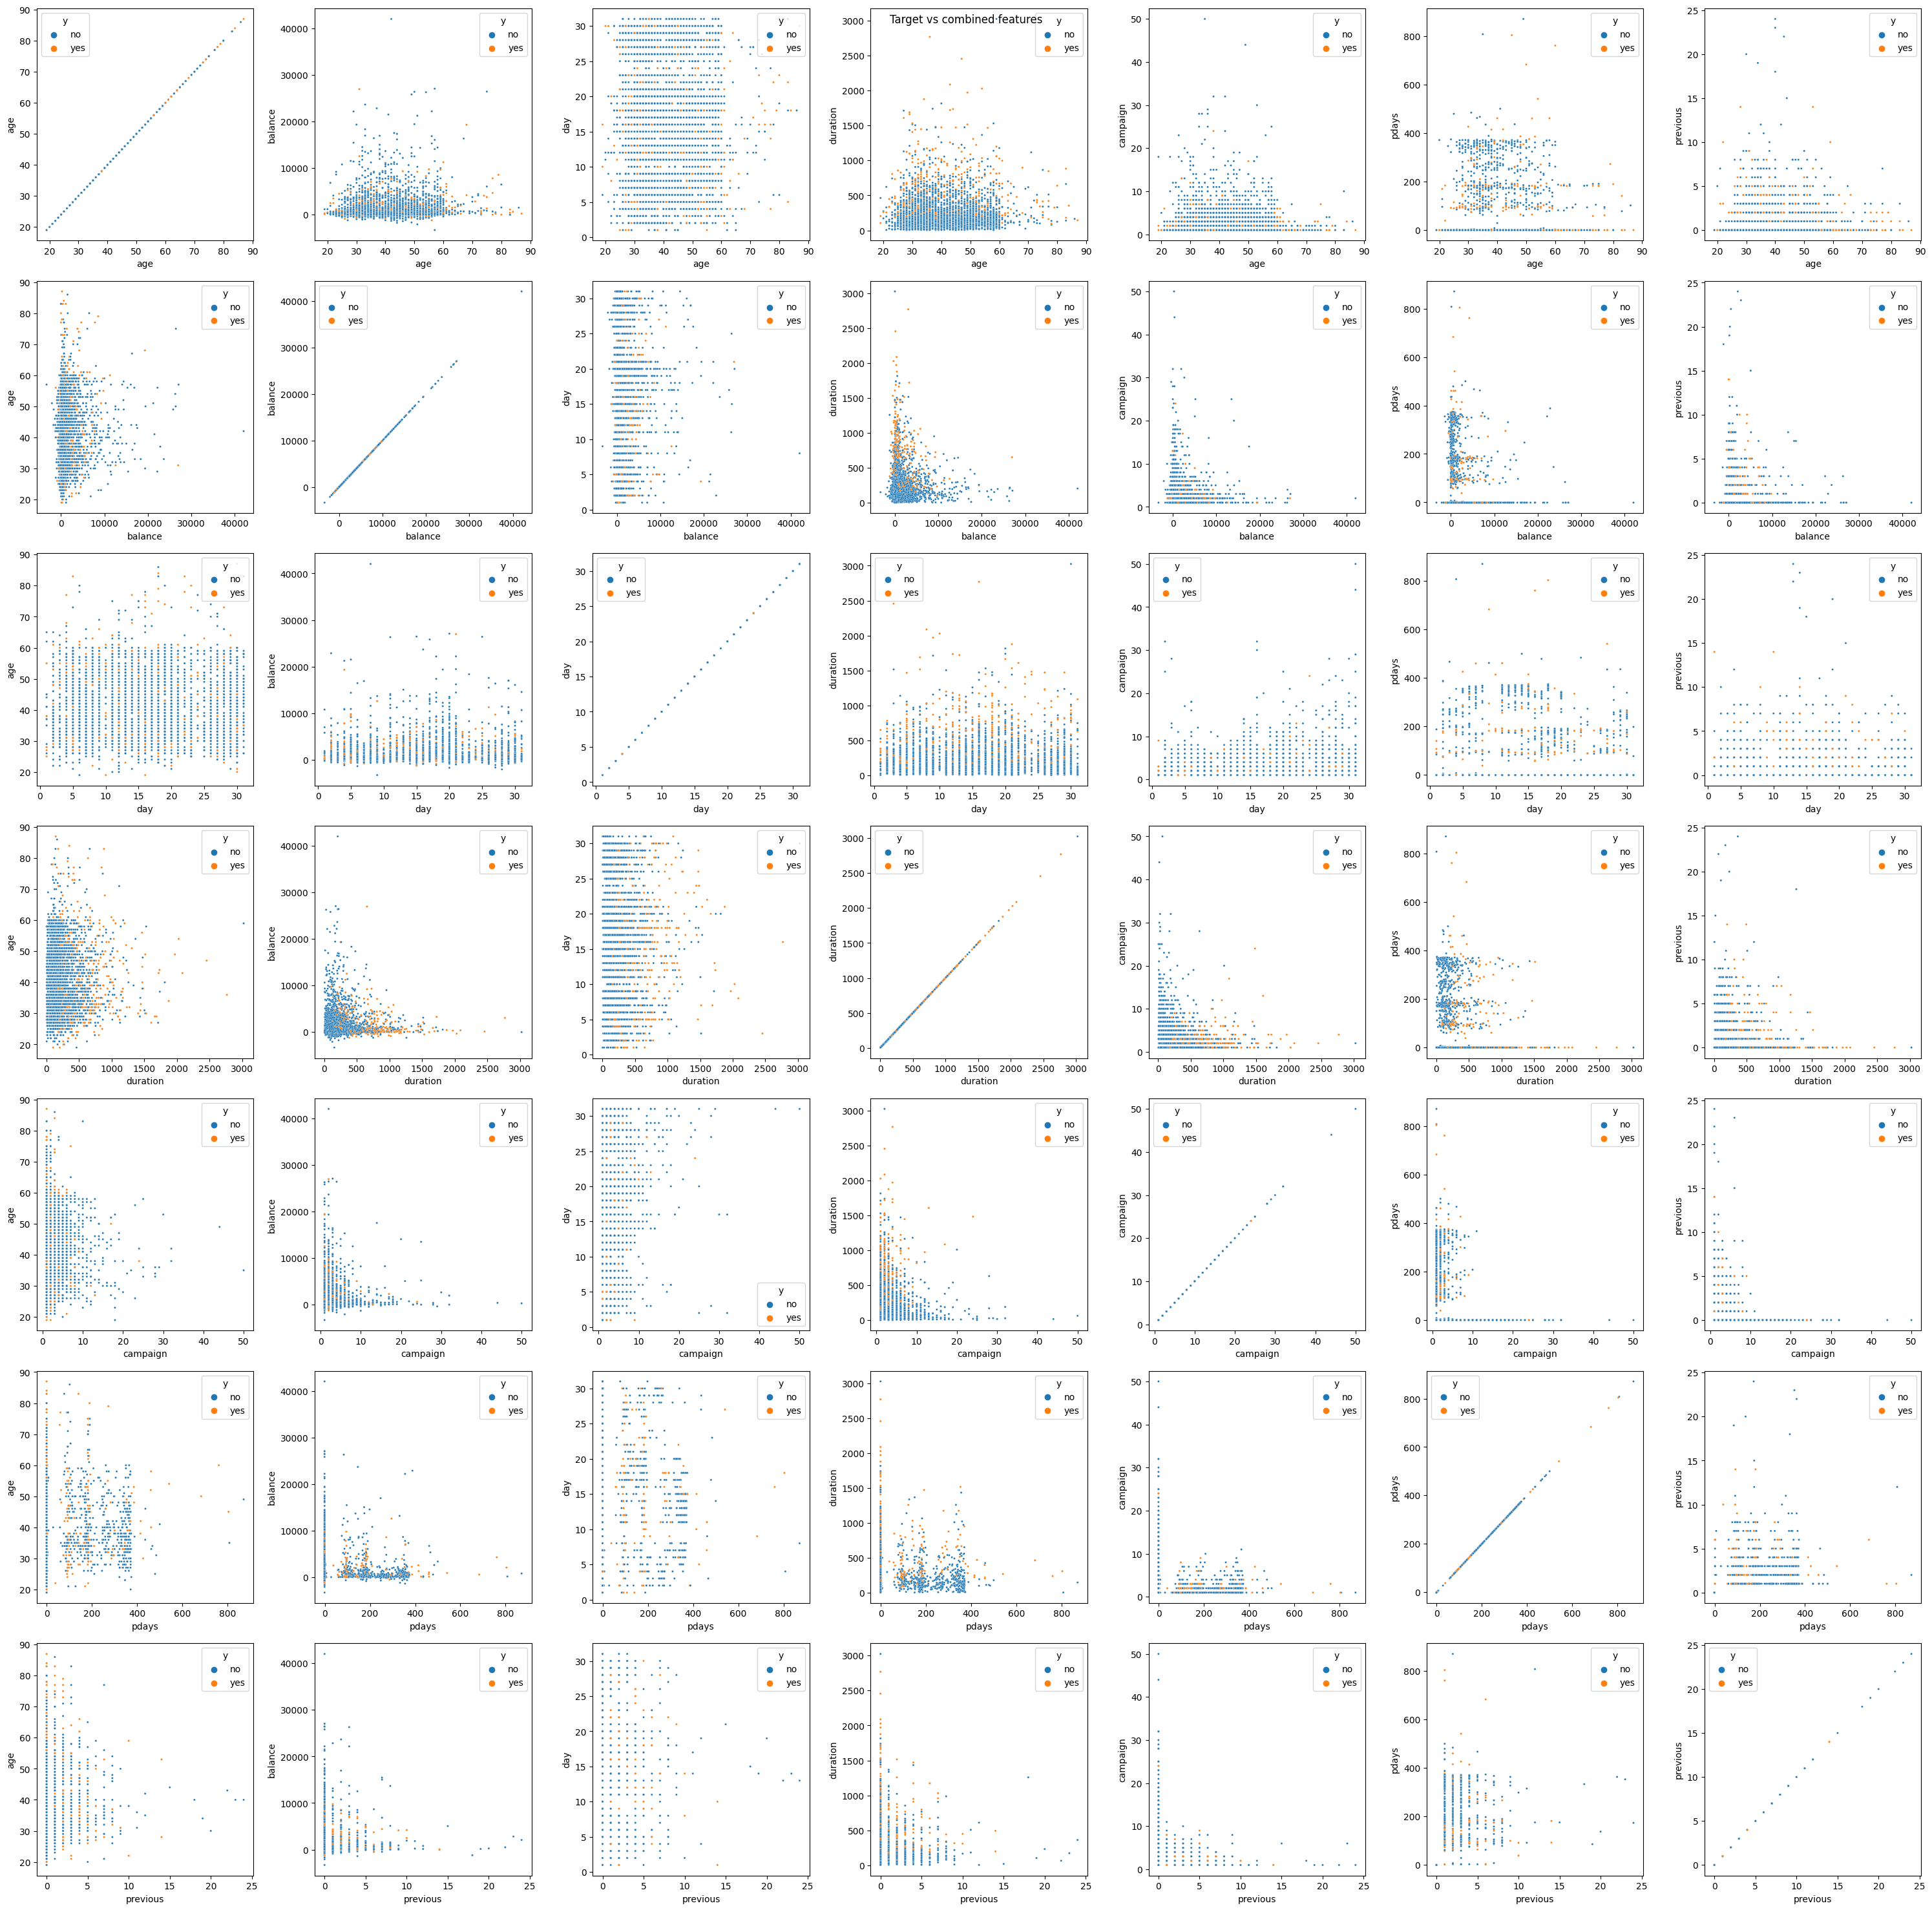

In [19]:
fig, axs = plt.subplots(len(numeric_values),len(numeric_values),figsize = (30,30))
for i, col1 in enumerate(bank_data_df[numeric_values].columns):
    for j, col2 in enumerate(bank_data_df[numeric_values].columns):
        sns.scatterplot(data= bank_data_df, x = col1, y= col2, hue = target_value, s = 5, ax = axs[i,j])

plt.suptitle("Target vs combined features")
plt.tight_layout()

#### For further analysis, we converted target_value to numeric values

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_target_value = le.fit_transform(bank_data_df[target_value])
bank_data_df[target_value] = new_target_value

<Axes: >

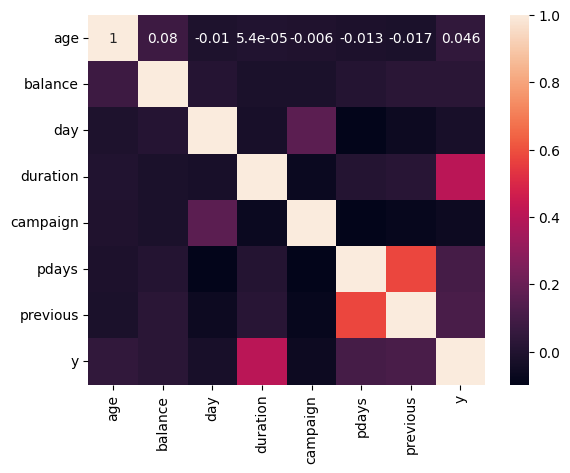

In [43]:
sns.heatmap(bank_data_df[np.append(numeric_values, np.array(target_value))].corr(), annot= True)

As we expected, our target value is more-less correlated with duration of the last contact. Tha makes sense because if a person talks longer to a consultant, he/she is getting more convinced to subscribe a term deposit.

# Analisys of non numeric values

In [46]:
non_numeric_values = bank_data_df.drop(columns=numeric_values).columns.values

In [47]:
non_numeric_values

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'y'], dtype=object)

#### We see that we have some datetime values describing observations. Let's see if and how it affects target value

In [96]:
bank_data_df = pd.read_csv('datasource/bank_data_model.csv')

In [97]:
bank_data_df['month']

0       may
1       oct
2       aug
3       nov
4       jun
       ... 
3611    jun
3612    feb
3613    jul
3614    jun
3615    nov
Name: month, Length: 3616, dtype: object

In [98]:
import calendar
month_num_dict = {month.lower(): index for index, month in enumerate(calendar.month_abbr) if month}
month_num_dict

{'jan': 1,
 'feb': 2,
 'mar': 3,
 'apr': 4,
 'may': 5,
 'jun': 6,
 'jul': 7,
 'aug': 8,
 'sep': 9,
 'oct': 10,
 'nov': 11,
 'dec': 12}

In [99]:
bank_data_df['month'] = bank_data_df['month'].map(month_num_dict)
bank_data_df['month']

0        5
1       10
2        8
3       11
4        6
        ..
3611     6
3612     2
3613     7
3614     6
3615    11
Name: month, Length: 3616, dtype: int64

In [100]:
bank_data_df['year'] = np.repeat(2024, repeats= len(bank_data_df[target_value]))
bank_data_df['day_of_the_year'] = pd.to_datetime(bank_data_df[["year","month","day"]])
bank_data_df['day_of_the_year'] = bank_data_df['day_of_the_year'].apply(lambda x: x.dayofyear)

In [139]:
time_df = bank_data_df.groupby(['day_of_the_year','y'], as_index= False).size()

In [140]:
time_df.head()

,day_of_the_year,y,size
0,7,no,1
1,11,yes,1
2,12,no,1
3,14,no,1
4,14,yes,2


In [141]:
time_df.describe()

,day_of_the_year,size
count,400.000000,400.000000
mean,180.805000,9.040000
std,91.058394,14.690232
min,7.000000,1.000000
25%,112.750000,1.000000
50%,182.000000,2.000000
75%,245.250000,7.000000
max,366.000000,87.000000


In [142]:
contacts_per_day_df = bank_data_df.groupby("day_of_the_year", as_index= False).size()
contacts_per_day_df = contacts_per_day_df.rename({"size" : "contacts_per_day"}, axis="columns")

In [143]:
time_df = time_df.join(contacts_per_day_df.set_index("day_of_the_year"), on = "day_of_the_year")
time_df["contacts_per_day"]

0      1
1      1
2      1
3      3
4      3
      ..
395    1
396    1
397    1
398    1
399    1
Name: contacts_per_day, Length: 400, dtype: int64

In [144]:
time_df["percent_of_contacts"] = time_df["size"] * 100/ time_df["contacts_per_day"]

In [145]:
time_df.head()

,day_of_the_year,y,size,contacts_per_day,percent_of_contacts
0,7,no,1,1,100.000000
1,11,yes,1,1,100.000000
2,12,no,1,1,100.000000
3,14,no,1,3,33.333333
4,14,yes,2,3,66.666667


In [155]:
time_df.isna().mean(axis=0)

day_of_the_year        0.0
y                      0.0
size                   0.0
contacts_per_day       0.0
percent_of_contacts    0.0
dtype: float64

In [156]:
time_df.describe()

,day_of_the_year,size,contacts_per_day,percent_of_contacts
count,400.000000,400.000000,400.000000,400.000000
mean,180.805000,9.040000,17.195000,62.000000
std,91.058394,14.690232,19.296317,35.629797
min,7.000000,1.000000,1.000000,1.428571
25%,112.750000,1.000000,2.000000,33.333333
50%,182.000000,2.000000,6.000000,66.666667
75%,245.250000,7.000000,29.000000,97.012987
max,366.000000,87.000000,94.000000,100.000000


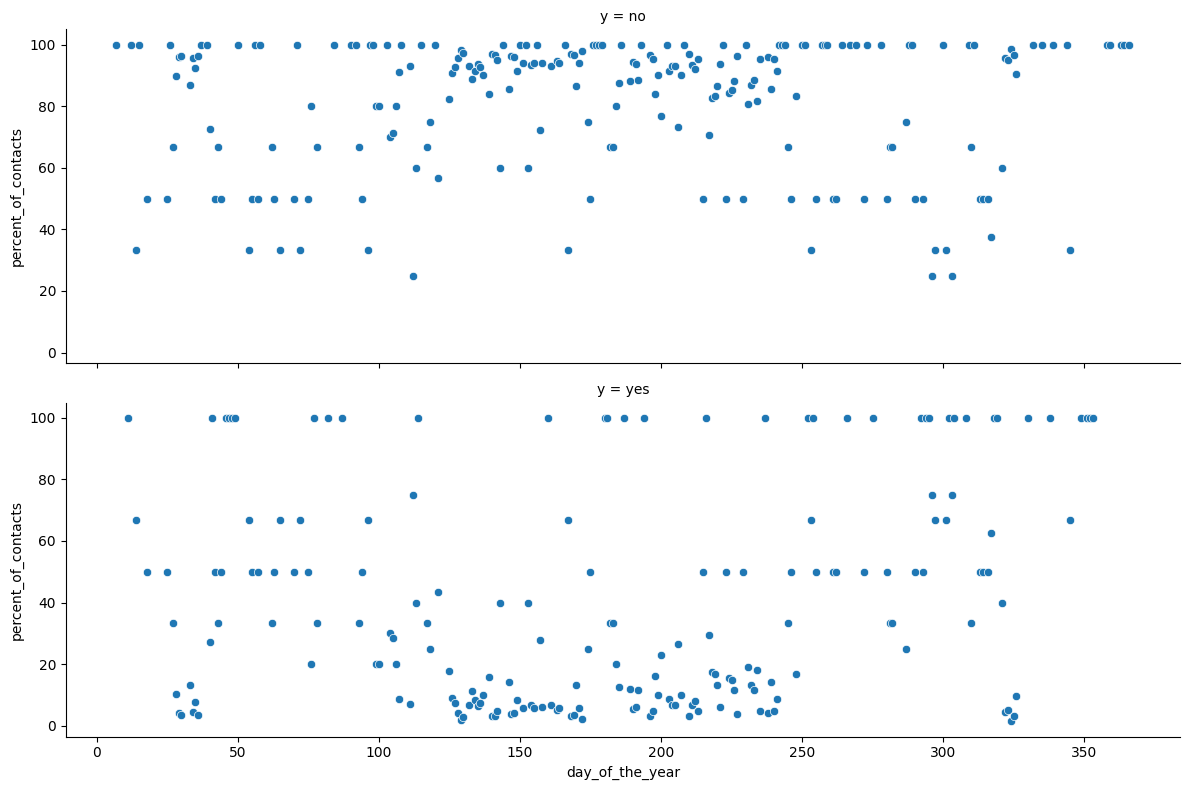

In [157]:
g = sns.FacetGrid(time_df, row = "y", height= 4, aspect= 3)
g.map(sns.scatterplot, "day_of_the_year", "percent_of_contacts")

In [158]:
only_months_df = bank_data_df.groupby(["month", "y"], as_index= False).size()

In [159]:
only_months_df.head()

,month,y,size
0,1,no,111
1,1,yes,12
2,2,no,148
3,2,yes,29
4,3,no,20


<Axes: xlabel='month', ylabel='size'>

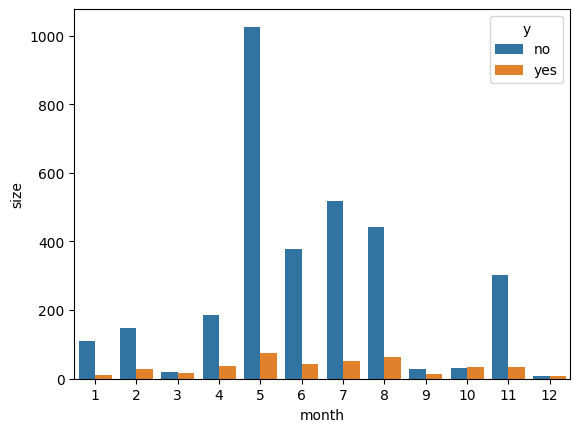

In [160]:
sns.barplot(data= only_months_df, x='month', y='size', hue="y")

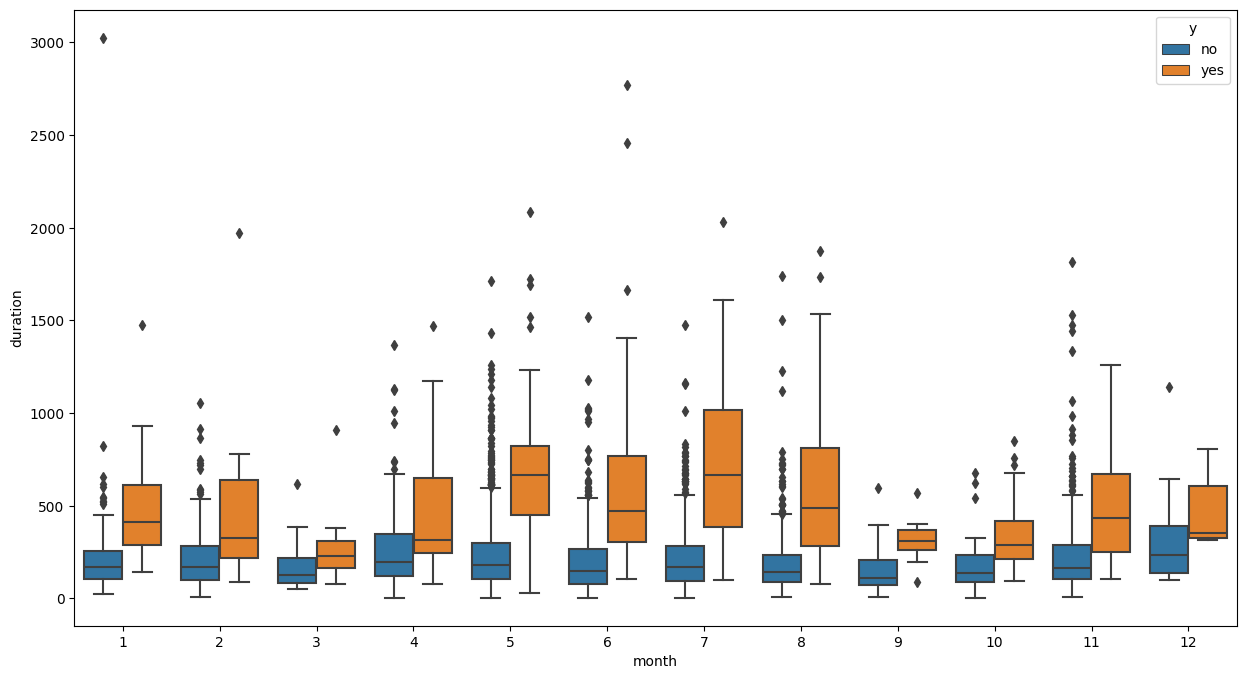

In [161]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data= bank_data_df, x = "month", y = "duration", hue= "y")